In [1]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=128027 sha256=88cc8d34c6acd702ff5a83a0dcb79e7f1f27fac3b6306520c9462389e34abaa0
  Stored in directory: /tmp/pip-ephem-wheel-cache-gbhsjjl_/wheels/b5/a9/15/900863b02cb736e4f08449e03d1d2d6ad447e06de70afc5fed
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage_github/sage/bin/python3 -m pip install --upgrade pip' command.
Note: yo

In [15]:
#sigmasv_links.sg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
import straph.betweenness as bt
import straph.betweenness.volumes as vol
import straph.paths.meta_walks as mw
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "sigmasv_nodes-simple.sg",
                      path_links=path_directory + "sigmasv_links-simple.sg")
S.describe()

Nb of Nodes :  5
Nb of segmented nodes :  5.0
Nb of links :  4
Nb of segmented links :  7.0
Nb of event times :  7


<AxesSubplot:xlabel='t', ylabel='Nodes'>

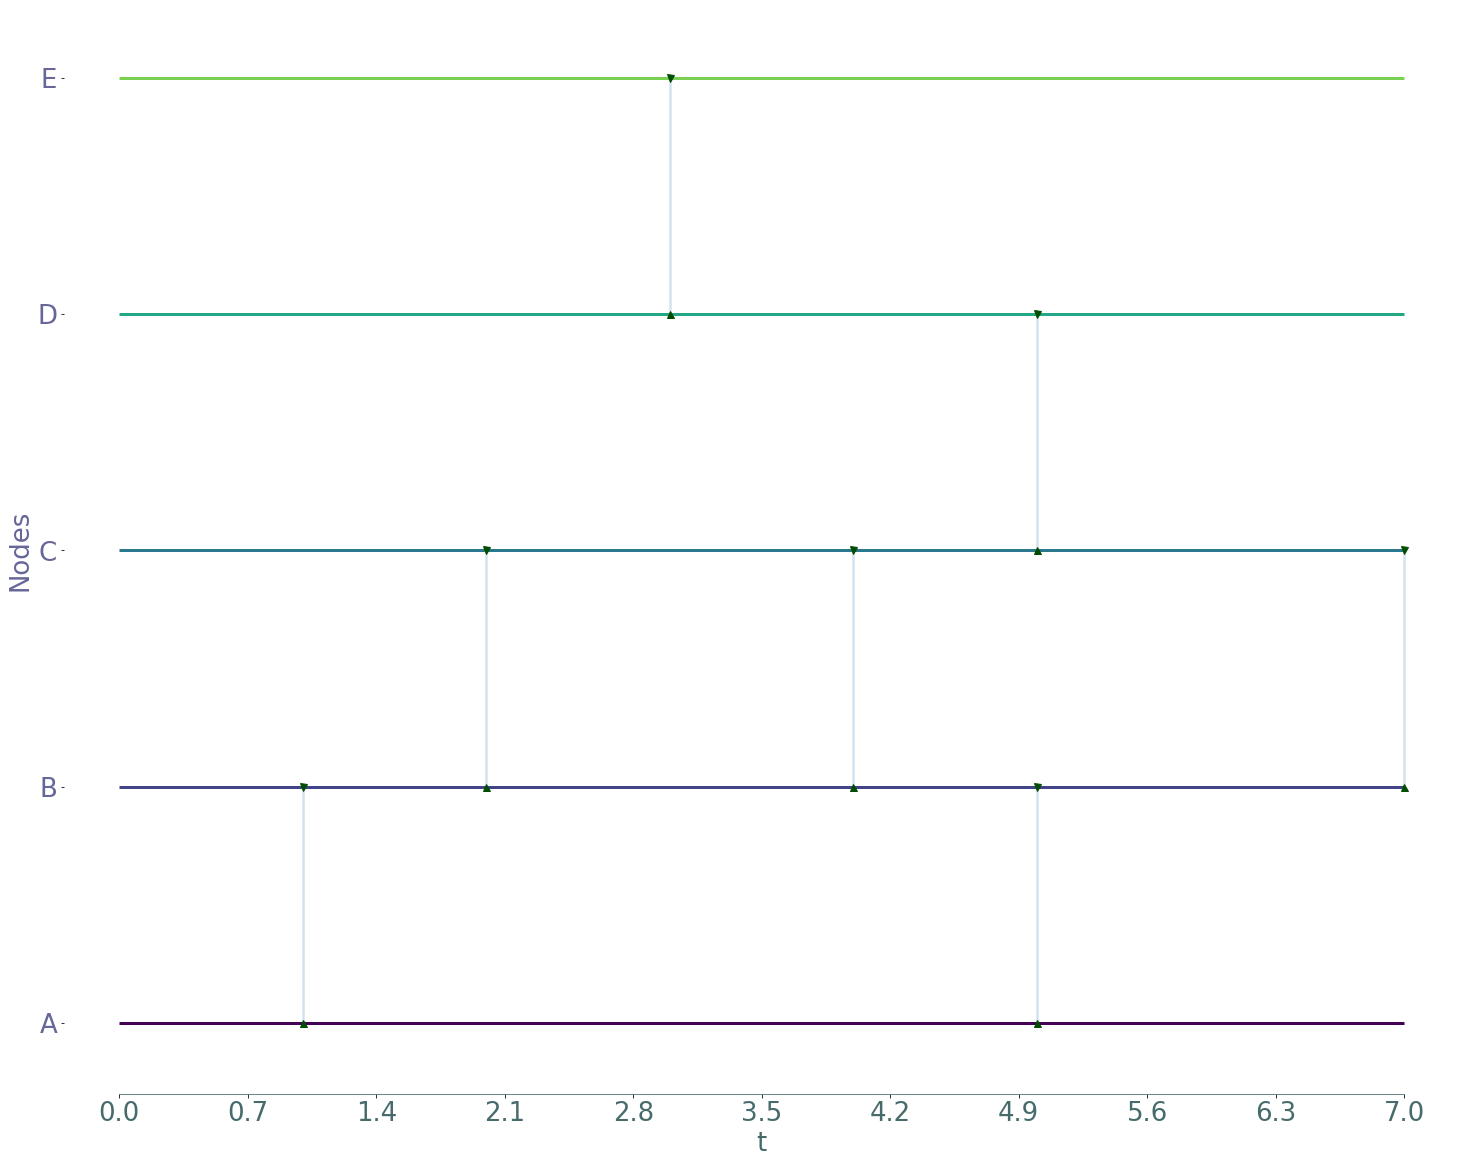

In [16]:
S.plot()

In [17]:
events, events_reverse = bt.events_dic(S)

In [18]:
link_ind = bt.link_index(S)
neighbors, neighbors_inv = bt.neighbors_direct(S)

In [19]:
node = 0

In [20]:
import operator
import networkx as nx
b = operator.lt
walk_type = "passive"
fun =  mw.Metawalk.co_sfp

In [21]:
pre, cur_best, opt_walk = bt.dijkstra_directed_dis_gen(S, node, events, events_reverse, neighbors, neighbors_inv, link_ind, b, fun, walk_type)


In [22]:
#pre, cur_best, opt_walk = bt.ford_bellman_directed_gen_dis(S, node, events, events_reverse, neighbors, neighbors_inv, b, fun, walk_type)


In [28]:
for i in range(len(S.nodes)):
    print(cur_best[i].values())

dict_values([inf, 0.0, inf, inf, inf, 0.0, inf])
dict_values([inf, 1.0, inf, inf, inf, 1.0, inf])
dict_values([inf, inf, 7.0, inf, 17.0, inf, 12.0])
dict_values([inf, inf, inf, inf, inf, 23.0, inf])
dict_values([inf, inf, inf, inf, inf, inf, inf])


In [29]:
cur_best2[2]

NameError: name 'cur_best2' is not defined

In [30]:
G = bt.predecessor_graph_dis_gen(S, pre,node)
preced = bt.preced_node(S, G,events,events_reverse)
node_inf, clos_inf = bt.remove_infinite_from_predecessor_dis_gen(S, G, events, events_reverse, opt_walk,
                                                                 cur_best, mw.Metawalk.co_short, len(S.nodes),
                                                                 walk_type, b)
GG = bt.graph_to_ordered(G, events, events_reverse)

In [31]:
node_inf

set()

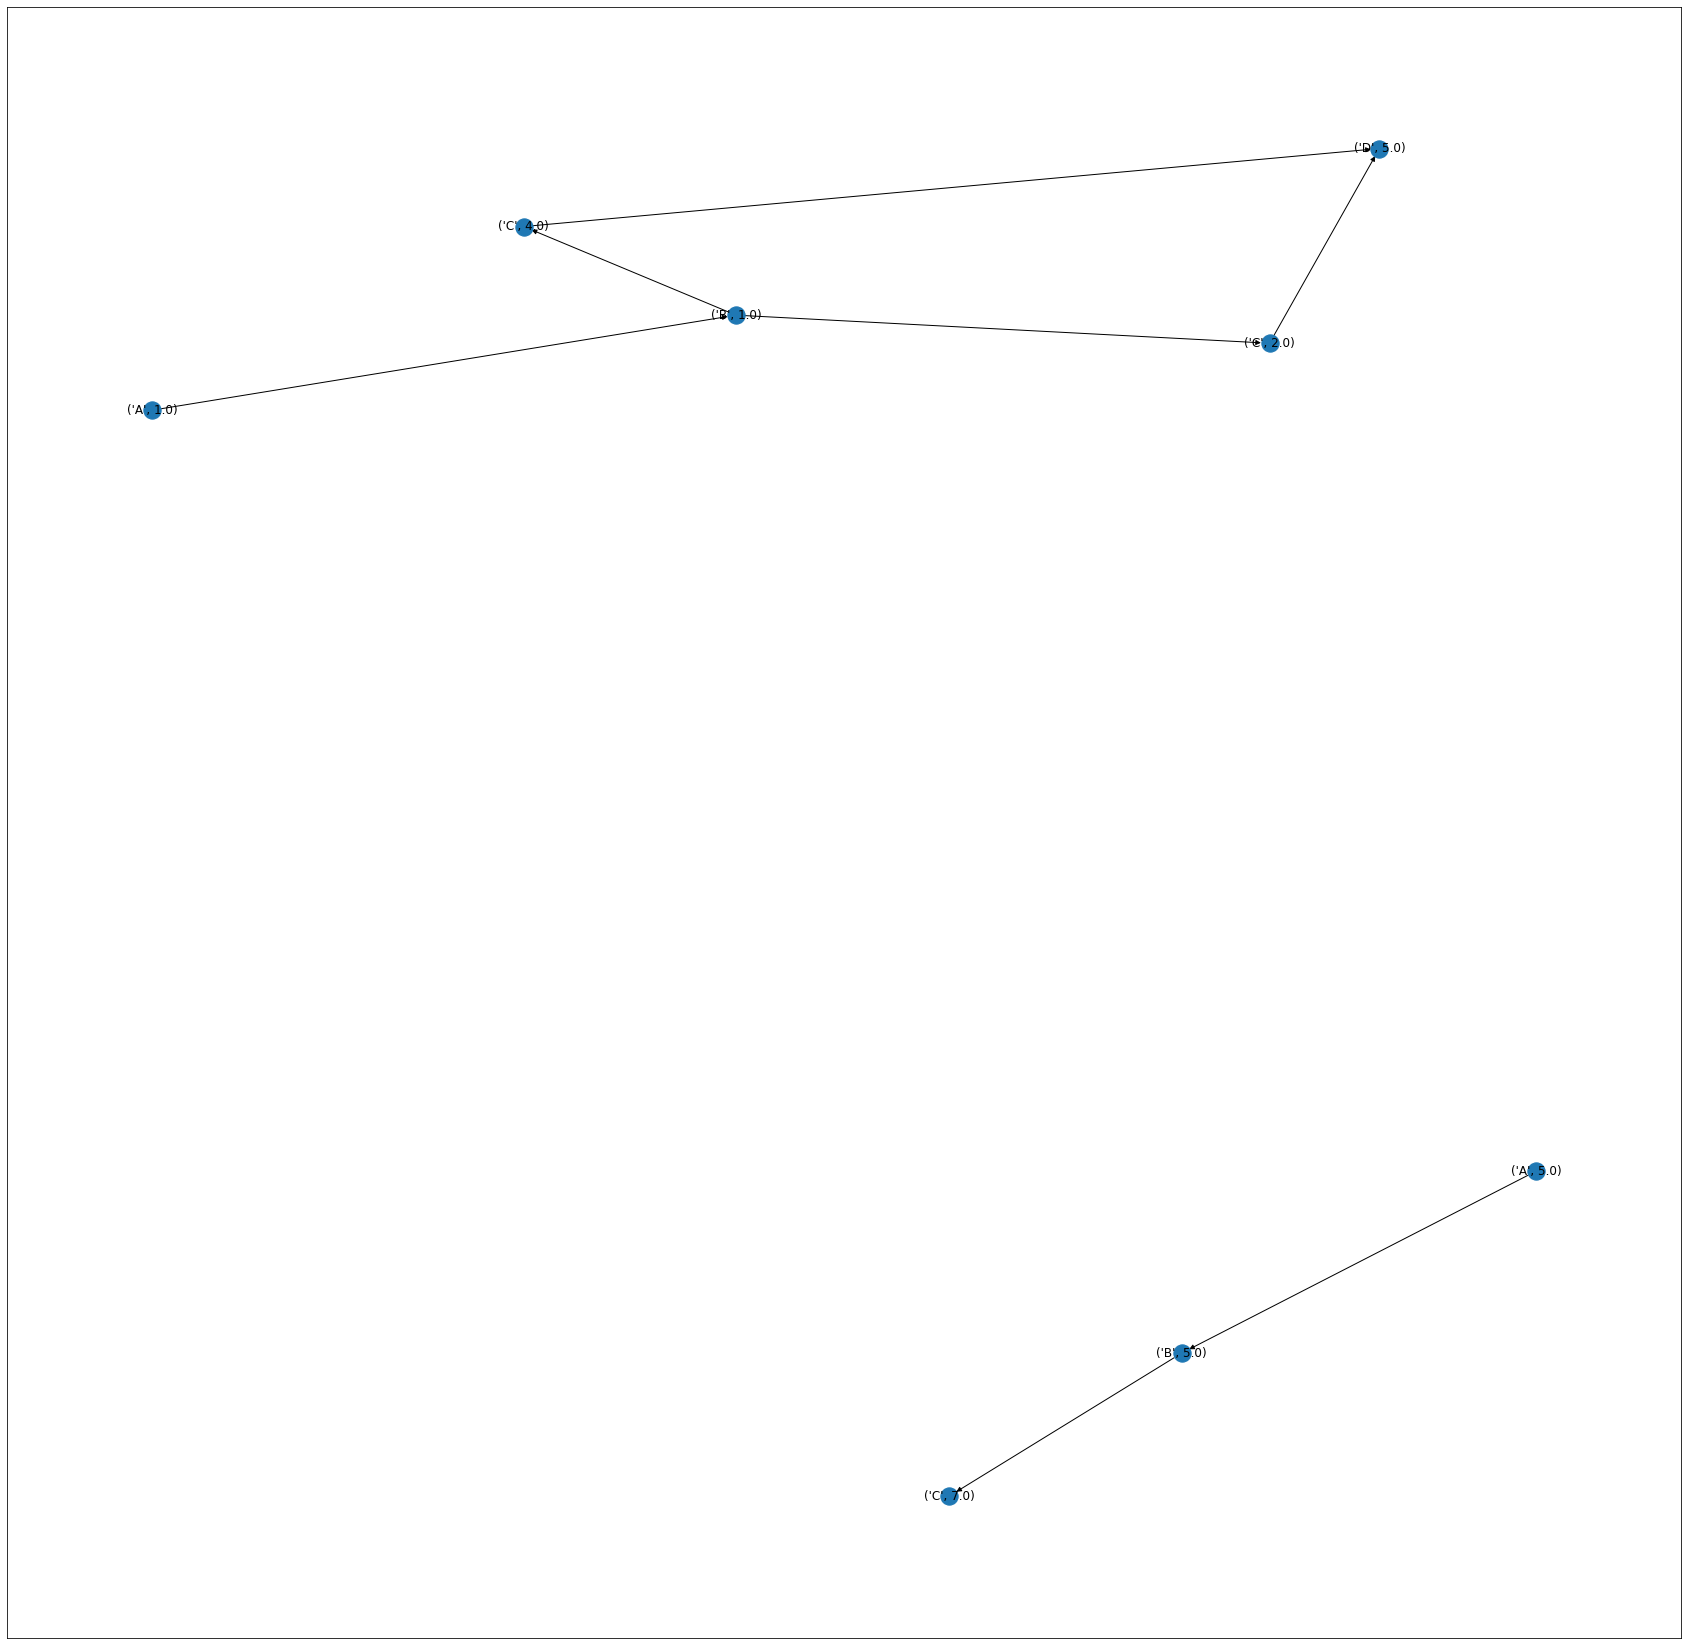

In [32]:
import networkx as nx
GD = G.graph
ren = dict()
for e in GD.nodes:
    ren[e] = (S.node_to_label[e[0]],e[1])
#print(ren)
GN =  nx.relabel_nodes(GD, ren, copy=True)
fig, ax = plt.subplots(figsize=(30,30))
nx.draw_networkx(GN,arrows=True,width = 1,ax = ax)

In [36]:
sigma = bt.volume_metapaths_at_dis_gen(G, node)
#print("sigma",sigma)
bt.sigma_infinite(sigma, node_inf)

In [37]:
sigma

{(0, 5.0): 1,
 (1, 5.0): 1,
 (2, 7.0): 1,
 (0, 1.0): 1,
 (1, 1.0): 1,
 (2, 2.0): 1,
 (2, 4.0): 1,
 (3, 5.0): 2}

In [39]:
sigma_tot, min_values, sigma_tot_t = bt.sigma_total_dis_gen(sigma, S, cur_best, node, events)

In [40]:
print(sigma_tot,sigma_tot_t)

{0: 2, 1: 2, 2: 1, 3: 2} {0: {1.0: 1, 5.0: 1}, 1: {1.0: 1, 5.0: 1}, 2: {2.0: 1, 4.0: 0, 7.0: 0}, 3: {5.0: 2}, 4: {}}


In [41]:
sigma_tot_r = bt.complete_sigma_tot_t(S, sigma_tot_t, node_inf, events, node)
print(sigma_tot_r)

{(0, 0.0): 0, (0, 1.0): 1, (0, 2.0): 0, (0, 3.0): 0, (0, 4.0): 0, (0, 5.0): 1, (0, 7.0): 0, (1, 0.0): 0, (1, 1.0): 1, (1, 2.0): 0, (1, 3.0): 0, (1, 4.0): 0, (1, 5.0): 1, (1, 7.0): 0, (2, 0.0): 0, (2, 1.0): 0, (2, 2.0): 1, (2, 3.0): 0, (2, 4.0): 0, (2, 5.0): 0, (2, 7.0): 0, (3, 0.0): 0, (3, 1.0): 0, (3, 2.0): 0, (3, 3.0): 0, (3, 4.0): 0, (3, 5.0): 2, (3, 7.0): 0, (4, 0.0): 0, (4, 1.0): 0, (4, 2.0): 0, (4, 3.0): 0, (4, 4.0): 0, (4, 5.0): 0, (4, 7.0): 0}


In [40]:
node_inf = node_inf.union(clos_inf)
sigma_r = bt.optimal_paths_resting_type(S, node, events, G, sigma, cur_best, node_inf, opt_walk, mw.Metawalk.co_short, len(S.nodes), walk_type)

In [41]:
sigma_r

{(0, 0.0): 1,
 (0, 1.0): 1,
 (0, 2.0): 1,
 (0, 2.5): 1,
 (0, 3.0): 1,
 (0, 4.0): 1,
 (0, 6.0): 1,
 (1, 0.0): 0.0,
 (1, 1.0): 1,
 (1, 2.0): 0,
 (1, 2.5): 0,
 (1, 3.0): 0,
 (1, 4.0): 1,
 (1, 6.0): 0,
 (2, 0.0): 0.0,
 (2, 1.0): 0.0,
 (2, 2.0): 1,
 (2, 2.5): 1,
 (2, 3.0): 1,
 (2, 4.0): 0,
 (2, 6.0): 1,
 (3, 0.0): 0.0,
 (3, 1.0): 0.0,
 (3, 2.0): 0.0,
 (3, 2.5): 0.0,
 (3, 3.0): 0.0,
 (3, 4.0): 2,
 (3, 6.0): 2,
 (4, 0.0): 0.0,
 (4, 1.0): 0.0,
 (4, 2.0): 0.0,
 (4, 2.5): 0.0,
 (4, 3.0): 0.0,
 (4, 4.0): 0.0,
 (4, 6.0): 0.0}

In [42]:
deltasvvt = bt.dictionary_svvt_dis_gen(S, node, sigma_tot_r,min_values, cur_best, sigma_tot, events)

In [43]:
deltasvvt

{(0, 0.0): 0.0,
 (0, 1.0): 0.0,
 (0, 2.0): 0.0,
 (0, 2.5): 0.0,
 (0, 3.0): 0.0,
 (0, 4.0): 0.0,
 (0, 6.0): 0.0,
 (1, 0.0): 0.0,
 (1, 1.0): 0.5,
 (1, 2.0): 0.0,
 (1, 2.5): 0.0,
 (1, 3.0): 0.0,
 (1, 4.0): 0.5,
 (1, 6.0): 0.0,
 (2, 0.0): 0.0,
 (2, 1.0): 0.0,
 (2, 2.0): 1.0,
 (2, 2.5): 0.0,
 (2, 3.0): 0.0,
 (2, 4.0): 0.0,
 (2, 6.0): 0.0,
 (3, 0.0): 0.0,
 (3, 1.0): 0.0,
 (3, 2.0): 0.0,
 (3, 2.5): 0.0,
 (3, 3.0): 0.0,
 (3, 4.0): 1.0,
 (3, 6.0): 0.0,
 (4, 0.0): 0.0,
 (4, 1.0): 0.0,
 (4, 2.0): 0.0,
 (4, 2.5): 0.0,
 (4, 3.0): 0.0,
 (4, 4.0): 0.0,
 (4, 6.0): 0.0}

In [44]:
preced = bt.preced_node(S, G,events,events_reverse)

In [45]:
preced[1]

{1.0: 1.0, 2.0: 2.0, 3.0: 3.0, 4.0: 4.0, 6.0: 6.0, 2.5: 2.0}

In [46]:
contribution = bt.general_contribution_from_node_dis_gen(S, G, node, GG, sigma_r, deltasvvt, events, events_reverse, pre, preced, walk_type)

In [47]:
contribution

{3: {4.0: 1.0, 0.0: 0.0, 1.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 6.0: 0.0},
 2: {4.0: 0.0, 6.0: 0.0, 3.0: 0.5, 2.5: 0.5, 2.0: 1.5, 0.0: 0.0, 1.0: 0.0},
 1: {6.0: 0.0, 3.0: 0.0, 2.5: 0.0, 2.0: 0.0, 4.0: 0.5, 1.0: 2.5, 0.0: 0.0},
 0: {4.0: 0.5, 1.0: 2.5, 0.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 6.0: 0.0},
 4: {0.0: 0.0, 1.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 4.0: 0.0, 6.0: 0.0}}